# Finding Change Points

What we are trying to replicate in python: MATLAB change function - ischange
Python function equivalent to MATLAB ischange function is ruptures package and Rbeast package

**Ruptures Package:** https://pypi.org/project/ruptures/
* A Python library for off-line change point detection. This package provides methods for the analysis and segmentation of non-stationary signals. Implemented algorithms include exact and approximate detection for various parametric and non-parametric models. ruptures focuses on ease of use by providing a well-documented and consistent interface. In addition, thanks to its modular structure, different algorithms and models can be connected and extended within this package.

**Rbeast Package:** http://pypi.org/project/Rbeast/
* A Python package for Bayesian changepoint detection and time series decomposition. BEAST (Bayesian Estimator of Abrupt change, Seasonality, and Trend) is a fast, generic Bayesian model averaging algorithm to decompose time series or 1D sequential data into individual components, such as abrupt changes, trends, and periodic/seasonal variations, as described in Zhao et al. (2019). BEAST is useful for changepoint detection (e.g., breakpoints, structural breaks, regime shifts, or anomalies), trend analysis, time series decomposition (e.g., trend vs seasonality), time series segmentation, and interrupted time series analysis.


**Wokring with float data: Float 7902199**
* read in sprof 
* read in nitrate 
* find the change points using the different packages
* see what you get/find out about the connection to ischange function
* compare to SAGE 


# Set Up

## Package Installs

In [329]:
#pip install ruptures

In [330]:
#pip install Rbeast

## Set up of Libraries

In [331]:
#Basic Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#Importing Data
import netCDF4
import os

#Change Point Packages
import Rbeast as rb
import ruptures as rpt

## Reading in the data

In [333]:
#Getting current working directory for the path to the data file
cwd = os.getcwd()
cwd

'C:\\Users\\jojob\\NOAA Lapenta Code\\bgcArgoDMQC\\no3_DMQC'

In [ ]:
#reading in the data 
file2read = netCDF4.Dataset(cwd + r'\7902199_Sprof.nc', 'r')

#viewing all of the variables in the file
print(file2read.variables.keys())

# Working with Profiles - PRES & NITRATE

## Setting up the data 

In [ ]:
# Selecting a variables: NO3, JULD, PRES
#extracting a numpy array

#Nitrate
nitrate = file2read.variables['NITRATE'][:]  

#Julian Day
jul = file2read.variables['JULD'][:]

#Pressure
pres = file2read.variables['PRES'][:]

# Close dataset
file2read.close()

### Nitrate

In [111]:
print(type(nitrate))

<class 'numpy.ma.core.MaskedArray'>


In [334]:
#looking at the mask array data
nitrate

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, 2.5546364784240723, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True, False,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=99999.0,
  dtype=float32)

In [113]:
nitrate.shape

(39, 526)

### Julian Day

In [116]:
#looking at the mask array data
jul

masked_array(data=[27156.91293984, 27167.13436343, 27177.38925927,
                   27187.60611113, 27197.86233799, 27208.08534722,
                   27218.34089121, 27228.53072918, 27238.74202548,
                   27248.99395836, 27259.27496529, 27269.45489585,
                   27279.7414815 , 27289.95043984, 27300.22247686,
                   27310.41863427, 27320.62578706, 27330.87387734,
                   27341.10229167, 27351.37218751, 27361.59609955,
                   27371.85464123, 27382.12043982, 27392.33563658,
                   27402.54231483, 27412.7815741 , 27423.02259259,
                   27433.27099538, 27443.47940974, 27453.72444447,
                   27463.92774308, 27474.17883102, 27484.3961227 ,
                   27494.62369215, 27504.86460651, 27515.07417824,
                   27525.32206019, 27535.53197918, 27545.77064817],
             mask=False,
       fill_value=1e+20)

In [117]:
jul.shape

(39,)

### Pressure

In [55]:
#looking at the mask array data
pres

masked_array(
  data=[[2.0, 3.9000000953674316, 5.900000095367432, ..., --, --, --],
        [0.699999988079071, 2.0999999046325684, 4.0, ..., --, --, --],
        [2.299999952316284, 4.0, 6.0, ..., --, --, --],
        ...,
        [2.299999952316284, 4.0, 6.099999904632568, ..., --, --, --],
        [2.299999952316284, 4.0, 6.0, ..., --, --, --],
        [2.0999999046325684, 4.0, 6.0, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=99999.0,
  dtype=float32)

In [61]:
pres.shape

(39, 526)

## Cleaning the Data

In [166]:
good_nitrate_mask = ~np.isnan(nitrate)  #returns a mask where True where values are good nirtrate vals and False is the NaNs
good_pres = pres[good_nitrate_mask] #getting only the pres vals where there is nitrate data 
good_nitrate = nitrate[good_nitrate_mask] #removing NaN 

In [174]:
max_good_nitrate_vals = np.sum(good_nitrate_mask, axis=0)  #counts the number of True values (good no3 vals) along the profile axis
print(f"Max good nitrate values per profile: {np.max(max_good_nitrate_vals)}") #finds the max number of valid nitrate values across all profiles and prints

Max good nitrate values per profile: 39


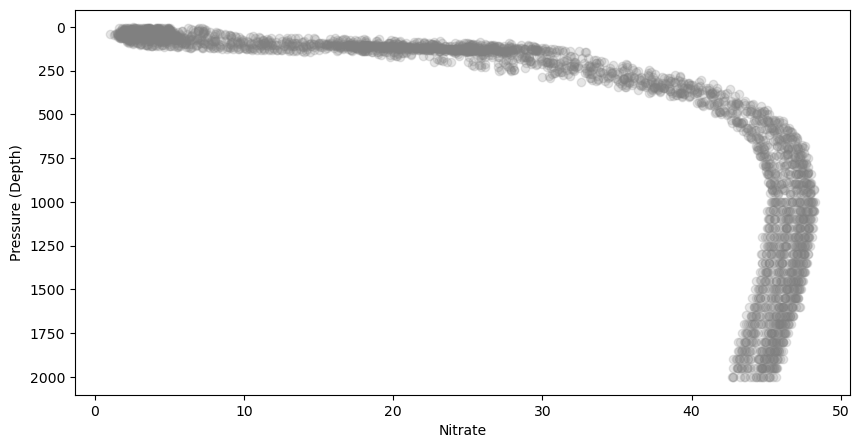

In [326]:
plt.figure(figsize=(10, 5))

# Section Plot: Nitrate vs. Pressure (Depth)
plt.scatter(good_nitrate, good_pres, c='grey', alpha=0.2)
plt.xlabel('Nitrate')
plt.ylabel('Pressure (Depth)')
plt.gca().invert_yaxis()  # Flip y-axis to show depth 
plt.show()


### Looking at data close to 1500 dBar

In [ ]:
threshold = 30  # Accept values within ±30 decibar

#pres vals close to 1500 decibar
near_1500_mask = (good_pres >= 1500 - threshold) & (good_pres <= 1500 + threshold)

#grabbing corresponding nitrate values
filtered_pres = good_pres[near_1500_mask]
filtered_nitrate = good_nitrate[near_1500_mask]

In [188]:
closest_vals = []

for profile in range(nitrate.shape[0]):  #looping through the 39 profiles
    #grabbing the pressure & nitrate data for the current interation of the profile
    pres_profile = pres[profile, :]  #selecting the whole row of pressure data
    nitrate_profile = nitrate[profile, :]  #selecting the whole row of nitrate data
    
    #removing NaN vals from the nitrate data
    valid_nitrate = ~np.isnan(nitrate_profile)

    #find pressure values near 1500 dbar within the 30 dbar threshold
    pressure_near_1500 = np.abs(pres_profile - 1500) <= threshold #using abs for all positive, calculates how far each pressure value is from 1500 

    #combine both into one mask
    valid_mask = valid_nitrate & pressure_near_1500

    if np.any(valid_mask):  # Ensure there are valid matches
        #finding the difference from 1500 dbar again collecting them in an array
        pressure_differences = np.abs(pres_profile[valid_mask] - 1500)

        #finds the index of the smallest value
        closest_idx = np.argmin(pressure_differences)

        #finding corresponding time and nitrate vals to closest pres to 1500 dbar
        matched_time = jul[profile]
        matched_nitrate = nitrate_profile[valid_mask][closest_idx]

        #adding the closest vals to the closest dict
        closest_vals.append((matched_time, matched_nitrate))

# Convert list to NumPy array
closest_vals_array = np.array(closest_vals)

# Separate the columns into two variables
closest_time = closest_vals_array[:, 0]  #time values
closest_nitrate = closest_vals_array[:, 1]  #nitrate values

In [200]:
# Convert JULD to readable date format
base_date = datetime.datetime(1950, 1, 1)
converted_juld = np.array([base_date + datetime.timedelta(days=j) for j in closest_time])

## Plotting

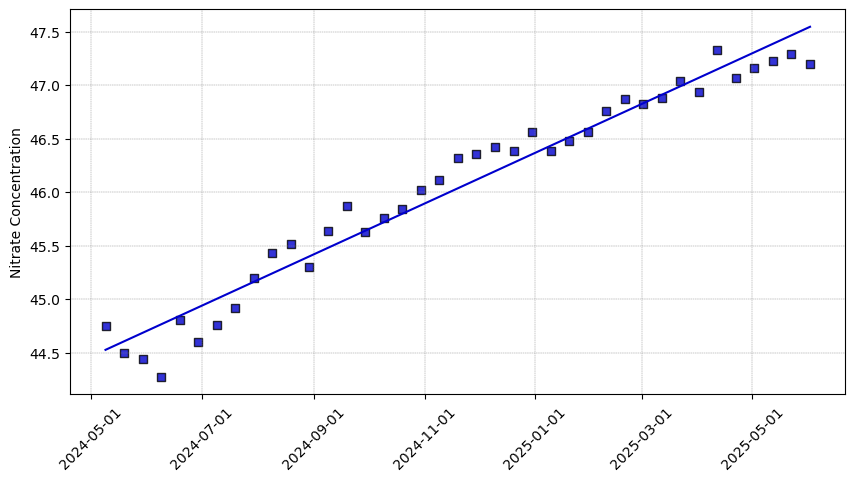

In [214]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
plt.scatter(converted_juld, closest_nitrate, marker='s', facecolors='mediumblue', edgecolors='black', alpha=.8)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

#line of best fit
jul_numeric = mdates.date2num([datetime.datetime(1950, 1, 1) + datetime.timedelta(days=j) for j in jul])

m, b = np.polyfit(jul_numeric, closest_nitrate, 1)  
y_fit = m * jul_numeric + b
plt.plot(jul_numeric, y_fit, color='mediumblue')


plt.grid(True, color='gray', linewidth=0.3, linestyle='--')
plt.ylabel("Nitrate Concentration")
plt.show()

In [233]:
# Drift is the slope per year
m * 365

2.8326666775568996

In [235]:
# offset is the intercept 
b + jul_numeric[0]*m

44.52645834731973

## Using Rupture on the Data

In [253]:
#use rupture pkge
algo = rpt.Pelt(model="rbf").fit(closest_vals_array)
change_points = algo.predict(pen=5) 
change_points

[20, 39]

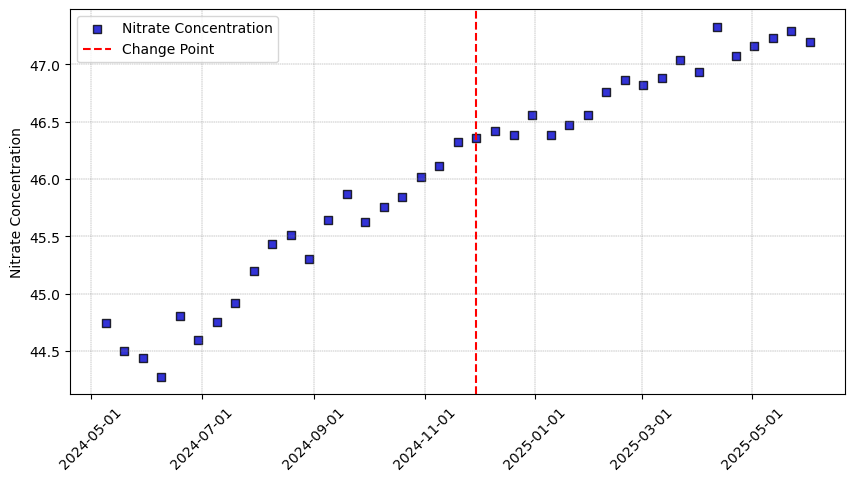

In [232]:
plt.figure(figsize=(10, 5))
plt.scatter(converted_juld, filtered_nitrate, marker='s', facecolors='mediumblue', edgecolors='black', alpha=.8, label="Nitrate Concentration")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

#change points
plt.axvline(x=converted_juld[20], color='red', linestyle="--", label="Change Point")

plt.grid(True, color='gray', linewidth=0.3, linestyle='--')
plt.ylabel("Nitrate Concentration")
plt.legend()
plt.show()


In [250]:
#before and after change point
#ruptures change point: 21
before_cp_time = jul[:20]
before_cp_nitrate = closest_nitrate[:20]

after_cp_time = jul[20:]
after_cp_nitrate = closest_nitrate[20:]


In [251]:
#before LBF
m1, b1 = np.polyfit(before_cp_time, before_cp_nitrate, 1)
y_fit_before = m1 * before_cp_time + b1

#after LBF
m2, b2 = np.polyfit(after_cp_time, after_cp_nitrate, 1)
y_fit_after = m2 * after_cp_time + b2


In [236]:
#before
drift_per_year_before = m1 * 365
drift_per_year_before

3.5640206013312046

In [237]:
#after
drift_per_year_after = m2 * 365
drift_per_year_after

2.040996713584372

In [259]:
#after
offset = b1 + jul[0]*m1
offset-43

1.334205421353289

In [258]:
offset = b2 + jul[20]*m2
offset -43

3.312052970447752

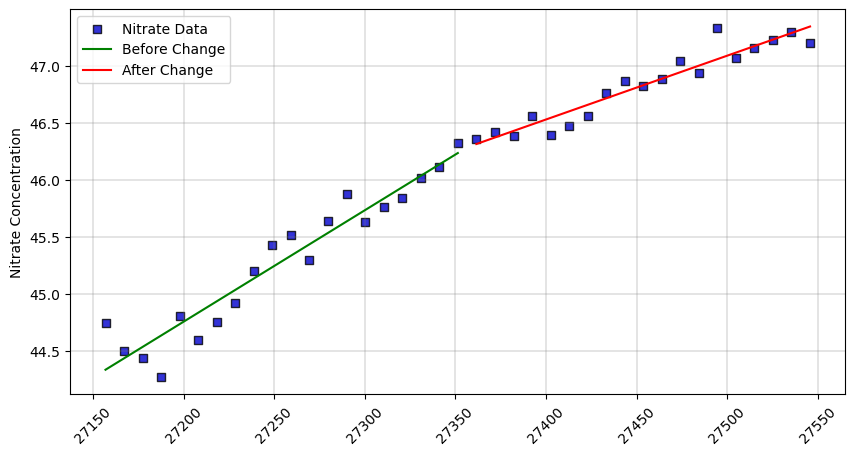

In [252]:
plt.figure(figsize=(10, 5))
plt.scatter(jul, closest_nitrate, marker='s', facecolors='mediumblue', edgecolors='black', alpha=.8, label="Nitrate Data")
plt.xticks(rotation=45)

#line of best fit
plt.plot(before_cp_time, y_fit_before, color='green', label="Before Change")
plt.plot(after_cp_time, y_fit_after, color='red', label="After Change")

plt.ylabel("Nitrate Concentration")
plt.legend()
plt.grid(True, color='gray', linewidth=0.3)
plt.show()


## Overlay SAGE fit with its offset/drift values on plot

In [261]:
#before and after change point
#sage change point: 20
before_cp_time_sage = jul[:19]
before_cp_nitrate_sage = closest_nitrate[:19]

after_cp_time_sage = jul[19:]
after_cp_nitrate_sage = closest_nitrate[19:]

##### First Line

In [305]:
m3 = 3.2396/365
m3

0.008875616438356163

In [306]:
#before
drift_per_year_before_sage = m3 * 365
drift_per_year_before_sage

3.2395999999999994

In [307]:
b3 = 1.3434 - jul[0]*m3 + 43
b3

-196.6909429038671

In [308]:
#after
offset = b3 + jul[0]*m3 
offset - 43

1.3434000000000026

In [309]:
#before LBF
y_fit_before_sage = m3 * before_cp_time_sage + b3

##### Second Line

In [310]:
m4 = 2.3817/365
m4

0.0065252054794520545

In [311]:
#after
drift_per_year_after_sage = m4 * 365
drift_per_year_after_sage

2.3817

In [312]:
b4 = 3.1974 - jul[19]*m4 + 43
b4

-132.27592366847838

In [313]:
offset = b4 + jul[19]*m4 
offset -43

3.1973999999999876

In [314]:
#after LBF
y_fit_after_sage = m4 * after_cp_time_sage + b4

##### Ruptures and SAGE Plot

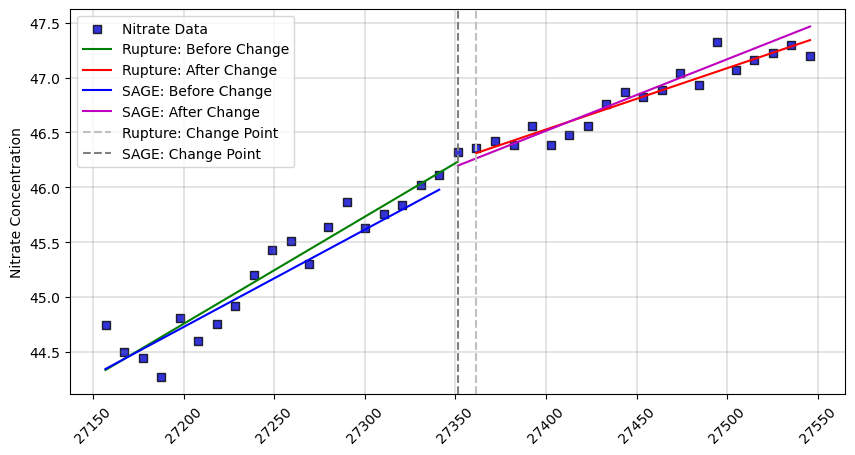

In [324]:
plt.figure(figsize=(10, 5))
plt.scatter(jul, closest_nitrate, marker='s', facecolors='mediumblue', edgecolors='black', alpha=.8, label="Nitrate Data")
plt.xticks(rotation=45)

#line of best fit - rupture
plt.plot(before_cp_time, y_fit_before, color='green', label="Rupture: Before Change")
plt.plot(after_cp_time, y_fit_after, color='red', label="Rupture: After Change")

#line of best fit - sage
plt.plot(before_cp_time_sage, y_fit_before_sage, color='blue', label="SAGE: Before Change")
plt.plot(after_cp_time_sage, y_fit_after_sage, color='m', label="SAGE: After Change")

plt.axvline(x=jul[20], color='silver', linestyle="--", label="Rupture: Change Point")
plt.axvline(x=jul[19], color='grey', linestyle="--", label="SAGE: Change Point")


plt.ylabel("Nitrate Concentration")
plt.legend()
plt.grid(True, color='gray', linewidth=0.3)
plt.show()


# Testing Python Rupture Package 

### Using the Pelt algorithm

Change Point Detection: Use the ruptures library to detect change points. 
* The model parameter --> specifies the type of model to use for change point detection. 
* The pen parameter --> controls the sensitivity of the algorithm to changes. 
* The higher the penalty, the fewer change points will be detected.

Change Points: The result will contain the indices where the change points are detected.

In [49]:
#PELT model
algo = rpt.Pelt(model="rbf").fit(nitrate)  
result = algo.predict(pen=10)

print(result)

Its stating there is a change point in the index of 39 (corresponds to the 40th observation) and the nitrate concentration shifts. 

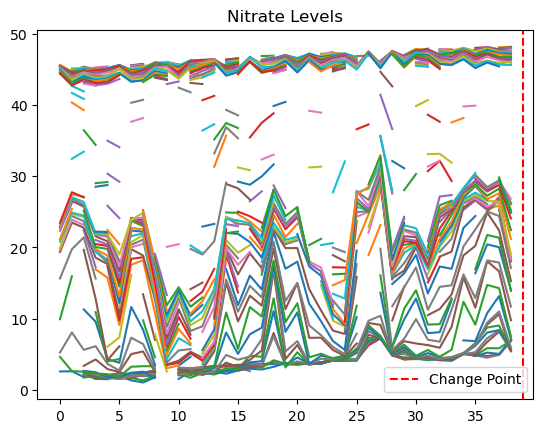

In [7]:
plt.plot(nitrate)
plt.axvline(x=39, color='red', linestyle='--', label="Change Point")
plt.legend()
plt.title("Nitrate Levels")
plt.show()

To see if there are multiple change points --> lowering pen or using Binseg instead of Pelt
* A higher penalty results in fewer change points, meaning the algorithm is stricter about detecting changes
* A lower penalty allows more change points, more sensitive to variations

In [8]:
algo = rpt.Binseg(model="rbf").fit(nitrate)
result = algo.predict(n_bkps=2)  #detecting 2 breakpoints
print(result)

[10, 35, 39]


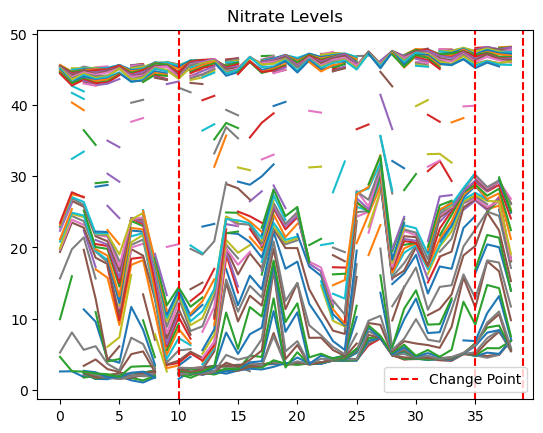

In [9]:
plt.plot(nitrate)
plt.axvline(x=10, color='red', linestyle='--', label="Change Point")
plt.axvline(x=35, color='red', linestyle='--')
plt.axvline(x=39, color='red', linestyle='--')

plt.legend()
plt.title("Nitrate Levels")
plt.show()

In [16]:
#use rupture pkge
algo = rpt.Pelt(model="rbf").fit(filtered_nitrate) #Radial Basis Function (RBF) model, which detects shifts in patterns based on feature similarity
result = algo.predict(pen=5)  # Adjust penalty value for tuning

print("Detected change points:", result)


Detected change points: [15, 35, 50, 76]


# Testing Pyton Rbeast Package

In [348]:
# A wrong way to call beast for nile: If the 'season' arg is missing, the default season='harmonic' is used such that
# there is a seasonal component to be fit. 
result = rb.beast(closest_nitrate, season='none')  # 'none' if there's no seasonality


Model fitted:  Y =  trend + error 

INFO: To supress messages, set print_param/print_warning/print_progresss = 0 in beast() and beast_irreg()
INFO: To supress messages, Set extra.printParameter/printWarning/printProgress = 0 in beast123()
INFO: To supress all messaages, set quiet=1 in beast() and beast_irreg() or extra.quiet=1 in beast123()

#--------------------------------------------------#
#       Brief summary of Input Data                #
#--------------------------------------------------#
Data Dimension: One signal of length 39
IsOrdered     : Yes, ordered in time
IsRegular     : Yes, evenly spaced at interval of  1 (unknown unit)
hasSeasonCmpnt: False | no periodic or seasonal component. The model Y=Trend+Error is fitted.
HasOutlierCmpt: False | If true, Y=Trend+Outlier+Error (experimental) is fitted instead of Y=Trend+Error 
Detrend       : False | If true, remove a global trend component before running BEAST & add it back after BEAST
MissingValue  : NaN  flagged as missing

(<Figure size 640x480 with 5 Axes>,
 array([<AxesSubplot:xlabel='[]', ylabel='trend'>,
        <AxesSubplot:xlabel='[]', ylabel='Pr(tcp)'>,
        <AxesSubplot:xlabel='[]', ylabel='tOrder'>,
        <AxesSubplot:xlabel='[]', ylabel='slpsgn'>,
        <AxesSubplot:xlabel='time', ylabel='error'>], dtype=object))

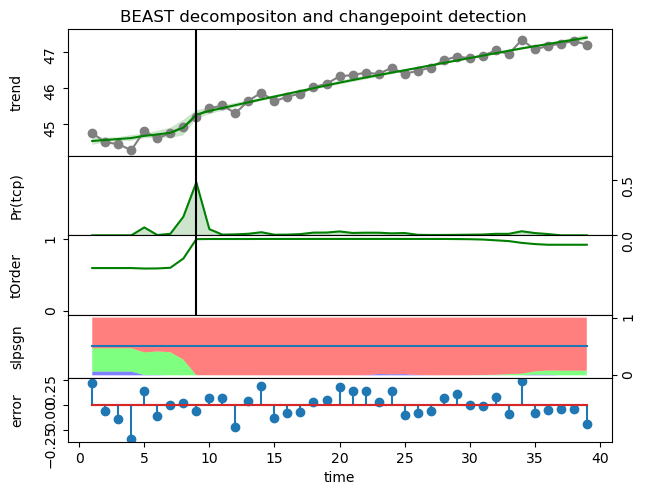

In [339]:
rb.plot(result)

In [350]:
rb.print(result)

#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
 No seasonal/periodic component present (i.e., season='none')


#####################################################################
#                      Trend  Changepoints                          #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.025|**                                              |
|Pr(ncp = 1 )=0.773|*********************************************** |
|Pr(ncp = 2 )=0.184|************                                    |
|Pr(ncp = 3 )=0.018|**                                              |
|Pr(ncp = 4 )=0.001|*     